# Лабораторная работа 4.3.5

#### Исследование свойств голограмм точечного источника и объёмного предмета

### Библиотеки 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import math as m
import random as r

from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.integrate import quad

In [2]:
def Line(x, a, b):
    """
    Параметрическая прямая
    """
    return a*x + b

#-----------------------------------------------------------------------------------------------------------
#
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ВНИМАНИЕ !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#
# Тупой питон не может подставить знак минус перед коэффициентом b! Если экспонента имеет вид e(^b), b < 0,
# то минус надо указать вручную.
#
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#
#-----------------------------------------------------------------------------------------------------------
def Exponent(x, a, b, c):
    """
    Параметрическая експонента (ae^(bx)
    """
    return a * np.exp(-b * x) + c

def CalcErrors(popt, cov, precA = 4, precB = 4, printRes = True):
    """
    Вычисляет погрешность МНК.
    Выводит в консоль значения + погрешность.
    Возвращает массив погрешностей.
    """
    errors = []
    for i in range(len(popt)):
        try:
          errors.append(np.absolute(cov[i][i])**0.5)
        except:
          errors.append( 0.00 )
    errors = np.array(errors)

    if (printRes == True):
        for i in range(0, len(errors)):
            print("c{:d} = {:.0{prec}f} +- {:.0{prec}f}".format(i + 1, popt[i], errors[i], prec = precA))

    return errors

def NpToStrList(np_array, precision):
    np_array = np.around(np_array.astype(float), precision)

    return ["{:.0{prec}f}".format(val, prec = precision) for val in np_array]

def NpToStr(array):
    return [str(f) for f in array]

def PrintMinMax(array, header):
    print(header + "min = {:.3f}, max = {:.3f}".format(min(array), max(array)))
    
#jnb.HideCell()

In [3]:
def _getIndex(indexRow, indexColumn, isRowDataSet):
    """
    Возвращает индексы в правильном порядке для обращения к массиву.
    """
    if (isRowDataSet == True):
        return (indexRow, indexColumn)
    else:
        return (indexColumn, indexRow)

def _drawRowGrid(file, rowGrid, rowIndex):
    if (rowGrid != None and rowGrid[rowIndex] > 0):
         file.write("\\hline\n" * rowGrid[rowIndex])

def _getTableDim(data, isRowDataSet):
    if (isRowDataSet == True):
        return (len(data), len(data[0]))
    else:
        return (len(data[0]), len(data))

def _createTable(fileName, data, isRowDataSet, 
                 columnGrid = None, rowGrid = None, preheader = None):
    """
    Создаёт вертикальную Latex-таблицу, если rowDataSet == false и горизонтальную, если rowDataSet == true.

    Аргументы:
    fileName     - имя выходного файла с таблицей;
    data         - массив данных таблицы;
    isRowDataSet - если true, массив данных содержит горизонтальную таблицу, иначе вертикальную;
    columnGrid   - строка, которая определяет тип сетки между колонками: \begin{tabular}{columnGrid};
    rowGrid      - список длины rowCount + 1, в котором содержится число:
                        - 0 - нет       горизонтальной линии;
                        - 1 - одинарная горизонтальная линия;
                        - 2 - двойная   горизонтальная линия.
    """
    rowCount, columnCount = _getTableDim(data, isRowDataSet)

    with open("tables\\" + fileName, 'w', encoding='utf-8') as file:

        if (columnGrid == None):
            columnGrid = "|" + 'c|' * columnCount
        
        file.write("\\begin{tabular}[t]{" + columnGrid +"}\n")

        _drawRowGrid(file, rowGrid, 0)
        
        if (preheader != None):
            file.write(preheader)

        for rowIndex in range(0, rowCount):

            for colIndex in range(0, columnCount - 1):
                index1, index2 = _getIndex(rowIndex, colIndex, isRowDataSet)

                file.write("{} & ".format(str(data[index1][index2]).replace('.', ',')))

            index1, index2 = _getIndex(rowIndex, columnCount - 1, isRowDataSet)

            file.write("{} \\\\ \n".format(str(data[index1][index2]).replace('.', ',')))

            _drawRowGrid(file, rowGrid, rowIndex + 1)

        # End data draw cycle
        file.write('\end{tabular}')

def CreateVerticalTable(fileName, data, 
                 columnGrid = None, rowGrid = None, preheader = None):
    """
    Создаёт вертикальную Latex-таблицу.
    """
    _createTable(fileName, data, False, columnGrid = columnGrid, rowGrid = rowGrid, preheader = preheader)

def CreateVerticalTableHeader(fileName, header, dataColumns, 
                 columnGrid = None, rowGrid = None, preheader = None):
    """
    Создаёт вертикальную Latex-таблицу.
    """
    _createTable(fileName, [[header[st]] + dataColumns[st] for st in range(0, len(dataColumns))],
                                False, columnGrid = columnGrid, rowGrid = rowGrid, preheader = preheader)

def CreateHorizontalTable(fileName, dataRows, 
                 columnGrid = None, rowGrid = None, preheader = None):
    """
    Создаёт горизонтальную Latex-таблицу.
    """
    _createTable(fileName, dataRows, True, columnGrid = columnGrid, rowGrid = rowGrid, preheader = preheader)
    

### Обработка результатов измерений

In [4]:
delta_x = 5 # mm
sig_delta_x = 0.5 # mm
eps_delta_x = sig_delta_x / delta_x
L = 1062 # mm
sig_L = 5 # mm
eps_L = sig_L / L
lambd = 523 * 10**-3 # um
D = L * lambd / delta_x # um
eps_D = (eps_L**2 + eps_delta_x**2)**0.5
sig_D = eps_D * D
print("D = {:.0f} +- {:.0f} мкм, {:.2f}%".format(D, sig_D, eps_D * 100))

D = 111 +- 11 мкм, 10.01%


In [5]:
b = 1011
a = 51
sig_b = 5
sig_a = 0.5
eps_b = sig_b / b
eps_a = sig_a / a

xd = 19 # mm
sig_xd = 0.5
N = 8
d = xd / N # mm
eps_d = sig_xd / xd
sig_d = eps_d * d

D2 = d * a / b * 10**3 # um
eps_D2 = (eps_d**2 + eps_a**2 + eps_b**2)**0.5
sig_D2 = D2 * eps_D2

print("D2 = {:f} +- {:f}. {:.2f}%".format(D2, sig_D2, eps_D2 * 100))

D2 = 119.807122 +- 3.416282. 2.85%


In [6]:
r = [2, 3.5, 4.5, 5.5, 6, 7, 7.5, 8]
n = [1, 2,   3,   4,   5, 6, 7,   8]
b = 780
a = 46
f = 43
sig_b = 5
sig_a = 0.5

r = np.array(r)
n = np.array(n)

sig_r = 0.5
eps_r = sig_r / r

rho = r * a / b
eps_rho = (eps_r**2 + eps_a**2 + eps_b**2)**0.5
sig_rho = eps_rho * rho

rho2 = rho**2 # mm^2
eps_rho2 = eps_rho * 2
sig_rho2 = eps_rho2 * rho2

popt1, pcov1 = curve_fit(Line, n, rho2)

errs1 = CalcErrors(popt1, pcov1)

z0 = popt1[0] * 10**-6  / (lambd * 10**-6) * 100 # 100 * m^2 / m = cm
eps_z0 = errs1[0] / popt1[0]
sig_z0 = eps_z0 * z0

print("z0 = {:f} +- {:f}. {:.2f}%".format(z0, sig_z0, eps_z0 * 100))

c1 = 0.0303 +- 0.0007
c2 = -0.0181 +- 0.0036
z0 = 5.795042 +- 0.137806. 2.38%


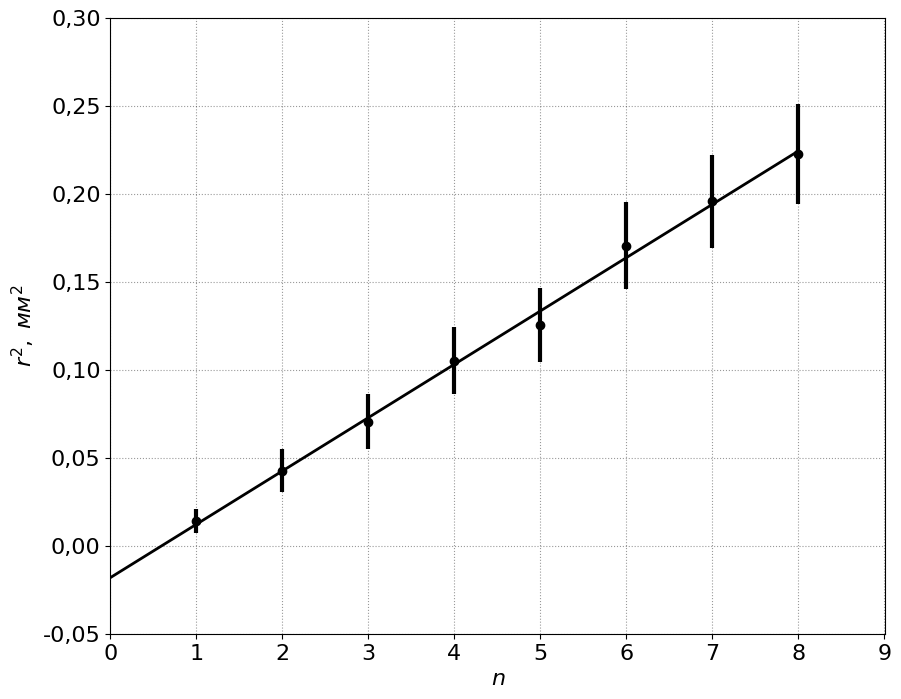

In [7]:
xMin = 0
xMax = 9.01

yMin = -0.05
yMax = 0.30001

xLabel          = r'$n$'
yLabel          = r'$r^2, \; мм^2$'

xMinorStep      = 0
xMajorStep      = 1

yMinorStep      = 0
yMajorStep      = 0.05

xTickMultiplier = 1
yTickMultiplier = 1

xPrecision      = 0
yPrecision      = 2

# Построение графика.

mpl.rcParams['font.size'] = 16

fig  = plt.figure(figsize = (10,8), dpi = 100)
axes = fig.add_subplot()

fig.set_facecolor("white")

# Заголовок

plt.xlabel(xLabel)
plt.ylabel(yLabel)

_n = np.array([0] + list(n))
plt.plot(_n, Line(_n, *popt1), linewidth = 2, color = 'black')
plt.errorbar(n, rho2, yerr = sig_rho2, xerr = 0, fmt='o', linewidth = 3, color = 'black')

# Оформление масштабных чёрточек

if yMajorStep > 0:
    y_major_ticks = np.arange(yMin, yMax, yMajorStep)
    axes.set_yticks(y_major_ticks)

if yMinorStep > 0:
    y_minor_ticks = np.arange(yMin, yMax, yMinorStep)
    axes.set_yticks(y_minor_ticks, minor = True)

if xMajorStep > 0:
    x_major_ticks = np.arange(xMin, xMax, xMajorStep)
    axes.set_xticks(x_major_ticks)

if xMinorStep > 0:
    x_minor_ticks = np.arange(xMin, xMax, xMinorStep)
    axes.set_xticks(x_minor_ticks, minor = True)

# Пределы графика

plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])

# Форматирование чёрточек

def xTickFormatter(tickVal, position):
    return "{:.{prec}f}".format(tickVal * xTickMultiplier, prec = xPrecision).replace('.', ',')

def yTickFormatter(tickVal, position):
    return "{:.{prec}f}".format(tickVal * yTickMultiplier, prec = yPrecision).replace('.', ',')

axes.xaxis.set_major_formatter(ticker.FuncFormatter(xTickFormatter))
axes.yaxis.set_major_formatter(ticker.FuncFormatter(yTickFormatter))

# Легенда
#plt.legend(loc = 'upper left')

# Сетка
plt.grid(which='major', linestyle = ':', c = 'black', alpha = 0.4)
plt.grid(which='minor', linestyle = ':', c = 'black', alpha = 0.1)

# Вывод
plt.savefig("Графики/rho_n.png")
plt.show()

In [8]:
f = 78 ## mm

def GetD(a, b):
    return a - f * b / (b - f)

def GetSigD(a, b, d):
    sig_a = 0.5 * (2)**0.5
    sig_b = 0.5
    eps_a = sig_a / a
    eps_b = sig_b / b
    sig1 = sig_b * ((- b * f) / (b - f)**2 + f / (b - f))
    return (sig_a**2 + (sig1)**2)**0.5

def PrintD(name, d, sig_d):
    eps_d = sig_d / d * 100
    print("{:s} = {:.1f} +- {:.1f}. {:.2f}%".format(name, d, sig_d, eps_d))

a = 825 - 692
b = 692
# d_real_angle
dra = GetD(a, b)
sig_dra = GetSigD(a, b, dra)
PrintD("dra", dra, sig_dra)

# d_virtual_angle
a = 825 - 760
b = 760
dva = -GetD(a, b)
sig_dva = GetSigD(a, b, dva)
PrintD("dva", dva, sig_dva)

# d_real_straight
a = 779 - 643
b = 643
drs = GetD(a, b)
sig_drs = GetSigD(a, b, drs)
PrintD("drs", drs, sig_drs)

a = 779 - 710
b = 710
dvs = -GetD(a, b)
sig_dvs = GetSigD(a, b, dvs)
PrintD("dvs", dvs, sig_dvs)

dra = 45.1 +- 0.7. 1.57%
dva = 21.9 +- 0.7. 3.23%
drs = 47.2 +- 0.7. 1.50%
dvs = 18.6 +- 0.7. 3.80%


In [17]:
xD = 7 # mm
sig_xD = 0.5
N = 3
D1 = xD / N
eps_D1 = sig_xD / xD
sig_D1 = eps_D1 * D1
b = 800 # mm
sig_b = 5

a = D * 10**-6 * b / D1 * 100 # cm
eps_a = (eps_D**2 + eps_b**2 + eps_D1**2)**0.5
sig_a = a * eps_a

print("D1 = {:.1f} +- {:.1f}".format(D1, sig_D1))
print("a = {:.1f} +- {:.1f}. {:.2f}%".format(a, sig_a, eps_a * 100))

dptr = 1/(a/10) + 1/(b/1000)
sig_dptr = ((sig_a/a**2)**2 + (sig_b/b**2)**2)**0.5
eps_dptr = sig_dptr / dptr
print("dptr = {:.2f} +- {:.2f}. {:.2f}%".format(dptr, sig_dptr, eps_dptr * 100))
f = 1 / dptr * 100 # cm
eps_f = eps_dptr
sig_f = eps_f * f
print("f = {:.2f} +- {:.2f}. {:.2f}%".format(f, sig_f, eps_f * 100))

111.08520000000001
D1 = 2.3 +- 0.2
a = 3.8 +- 0.5. 12.31%
dptr = 3.88 +- 0.03. 0.83%
f = 25.80 +- 0.22. 0.83%
